DataSet:
https://www.kaggle.com/fivethirtyeight/fivethirtyeight-police-killings-dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd

In [4]:
df = pd.read_csv('police_killings.csv', encoding='ISO-8859-1')

In [5]:
# Removing missing values
df.dropna(inplace=True)

In [6]:
df.shape

(436, 34)

In [7]:
df.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

In [8]:
# want to see the whole pack of features
pd.set_option('display.max_columns', 37)
df.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,namelsad,lawenforcementagency,cause,armed,pop,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,32.529577,-86.362829,1,51,30902,1051030902,1051,Census Tract 309.02,Millbrook Police Department,Gunshot,No,3779,60.5,30.5,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,31.321739,-92.434860,22,79,11700,22079011700,22079,Census Tract 117,Rapides Parish Sheriff's Office,Gunshot,No,2769,53.8,36.2,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,42.583560,-87.835710,55,59,1200,55059001200,55059,Census Tract 12,Kenosha Police Department,Gunshot,No,4079,73.8,7.7,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,33.939298,-118.219463,6,37,535607,6037535607,6037,Census Tract 5356.07,South Gate Police Department,Gunshot,Firearm,4343,1.2,0.6,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,41.148575,-81.429878,39,153,530800,39153530800,39153,Census Tract 5308,Kent Police Department,Gunshot,No,6809,92.5,1.4,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 466
Data columns (total 34 columns):
name                    436 non-null object
age                     436 non-null object
gender                  436 non-null object
raceethnicity           436 non-null object
month                   436 non-null object
day                     436 non-null int64
year                    436 non-null int64
streetaddress           436 non-null object
city                    436 non-null object
state                   436 non-null object
latitude                436 non-null float64
longitude               436 non-null float64
state_fp                436 non-null int64
county_fp               436 non-null int64
tract_ce                436 non-null int64
geo_id                  436 non-null int64
county_id               436 non-null int64
namelsad                436 non-null object
lawenforcementagency    436 non-null object
cause                   436 non-null object
armed               

In [10]:
df.describe()

,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,436.000000,436.0,436.000000,436.000000,436.000000,436.000000,436.000000,4.360000e+02,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,15.529817,2015.0,36.430927,-97.223474,25.018349,91.970183,208915.770642,2.511053e+10,25110.318807,4821.513761,46732.626147,52969.699541,0.889845,2.495413,2.502294,0.118348,0.224241
std,8.506740,0.0,5.256212,17.229963,16.875327,111.865977,318299.559362,1.691215e+10,16912.139779,2368.148658,20809.021178,12781.627543,0.339989,1.397034,1.303398,0.069653,0.161385
min,1.000000,2015.0,19.915194,-159.642700,1.000000,1.000000,100.000000,1.003010e+09,1003.000000,403.000000,10290.000000,24927.000000,0.184049,1.000000,1.000000,0.011335,0.013547
25%,8.000000,2015.0,33.349889,-112.053274,6.000000,29.000000,4557.500000,6.102001e+09,6102.000000,3401.250000,32591.000000,44291.750000,0.636519,1.000000,1.000000,0.068560,0.106451
50%,15.000000,2015.0,35.802017,-94.900047,24.000000,64.000000,31703.500000,2.401024e+10,24010.000000,4473.000000,42770.500000,51171.000000,0.856491,2.000000,2.000000,0.106796,0.170703
75%,23.000000,2015.0,39.936862,-82.798584,40.000000,109.500000,273902.000000,4.011032e+10,40110.000000,5823.250000,56518.000000,56853.000000,1.082035,4.000000,4.000000,0.144722,0.295070
max,31.000000,2015.0,61.218408,-68.100007,56.000000,740.000000,979500.000000,5.600500e+10,56005.000000,26826.000000,142500.000000,110292.000000,2.865216,5.000000,5.000000,0.507614,0.828070


In [11]:
df.describe(include=['object', 'bool'])

,name,age,gender,raceethnicity,month,streetaddress,city,state,namelsad,lawenforcementagency,cause,armed,share_white,share_black,share_hispanic,p_income,pov
count,436,436,436,436,436,436,436,436,436,436,436,436,436,436,436,436,436
unique,434,60,2,6,6,433,336,47,371,349,5,8,347,237,285,422,267
top,Unknown,35,Male,White,March,E Baseline Rd and S 48th St,Los Angeles,CA,Census Tract 2,Los Angeles Police Department,Gunshot,Firearm,87.2,0,0,22969,7.3
freq,3,17,414,216,110,2,9,74,5,10,381,216,5,21,16,3,5


In [36]:
df['share_white'] = df['share_white'].astype('float64')
df['share_black'] = df['share_black'].astype('float64')
df['share_hispanic'] = df['share_hispanic'].astype('float64')

In [42]:
list_of_features = ['age', 'day', 'latitude', 'longitude', 'geo_id', 'county_id', 'pop', 'share_white',
                    'share_black', 'share_hispanic', 'p_income', 'pov', 'urate', 'college']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000022518DD9B0>,
      dtype=object)

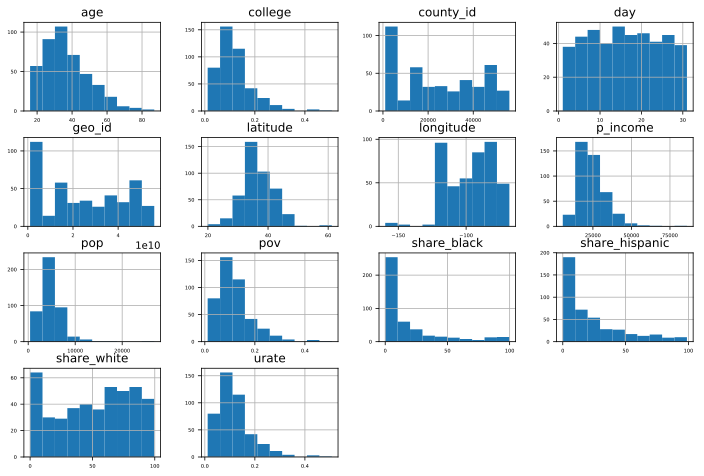

In [48]:
df[list_of_features].hist(figsize=(12, 8), xlabelsize=5, ylabelsize=5) # take a look at the distribution of features

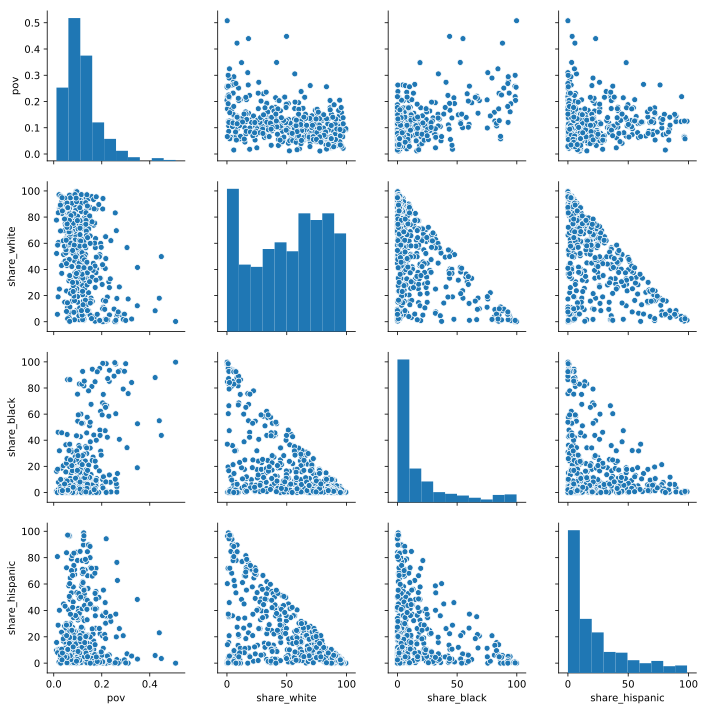

In [51]:
cols = ['pov', 'share_white', 'share_black', 'share_hispanic']
sns_plot = sns.pairplot(df[cols]) # here we can notice in which way some of the features are related

In [14]:
def seasonDifiner(x):
    seasons = {('January', 'February', 'December'): 'Winter', ('March', 'April', 'May'): 'Spring',
               ('June', 'July', 'August'): 'Summer', ('September', 'October', 'November'): 'Autumn'}
    for key in seasons.keys():
        if x in key:
            return seasons[key]

In [15]:
df['season'] = df['month'].map(seasonDifiner) # adding a new feature

In [16]:
df[df['age'] != 'Unknown']['age'].astype(int).mean() # calculate the average value to replace 'Unknown'

37.166666666666664

In [17]:
df['age'].replace({'Unknown': 37}, inplace=True) # replacing 'Unknown' with average value

In [18]:
df['age'] = df['age'].astype('int64')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 466
Data columns (total 38 columns):
name                    436 non-null object
age                     436 non-null int64
gender                  436 non-null object
raceethnicity           436 non-null object
month                   436 non-null object
day                     436 non-null int64
year                    436 non-null int64
streetaddress           436 non-null object
city                    436 non-null object
state                   436 non-null object
latitude                436 non-null float64
longitude               436 non-null float64
state_fp                436 non-null int64
county_fp               436 non-null int64
tract_ce                436 non-null int64
geo_id                  436 non-null int64
county_id               436 non-null int64
namelsad                436 non-null object
lawenforcementagency    436 non-null object
cause                   436 non-null object
armed                

In [21]:
def ageRecognition(x):
    if x < 25:
        return 'Junior'
    elif x >= 50:
        return 'Senior'
    else:
        return 'Middle age'

In [22]:
df['generation'] = df['age'].map(ageRecognition) # new feature

In [23]:
def unemploymentMatcher(x): # as of June 2018, the unemployment rate in the US is 4%
    if x > 0.04:
        return 1
    else:
        return 0

In [24]:
df['high_lvl_of_unempl'] = df['urate'].map(unemploymentMatcher) # new feature

In [25]:
df['low_lvl_of_education'] = df['college'].map(lambda x: 1 if x < 0.42 else 0) # 42% percent of citizens in the USA have a university degree

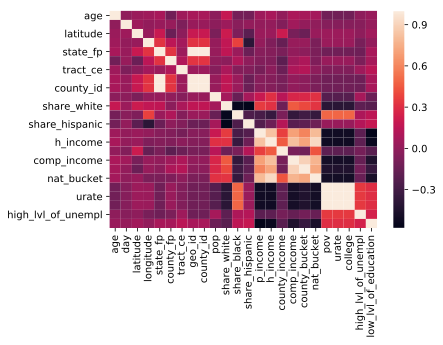

In [63]:
sns.heatmap(df.drop(['year'], axis=1).corr());

In [26]:
df.loc[0:5, ['generation', 'armed', 'raceethnicity']]

,generation,armed,raceethnicity
0,Junior,No,Black
1,Middle age,No,White
2,Middle age,No,White
3,Middle age,Firearm,Hispanic/Latino
4,Middle age,No,White
5,Middle age,No,White


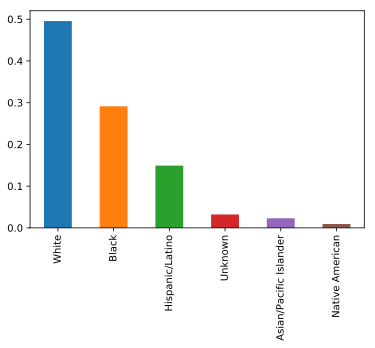

In [27]:
df['raceethnicity'].value_counts(normalize=True).plot(kind='bar') # distribution accidents among different races

In [28]:
df.groupby(['generation'])['armed', 'raceethnicity', 'high_lvl_of_unempl'].describe(include='object')
# allows us to find out which weapon were most often armed with the deceased in different age groups and which race they were

armed                      raceethnicity                   
           count unique      top freq         count unique    top freq
generation                                                            
Junior        70      7  Firearm   31            70      5  Black   26
Middle age   292      8  Firearm  152           292      6  White  142
Senior        74      5  Firearm   33            74      5  White   51

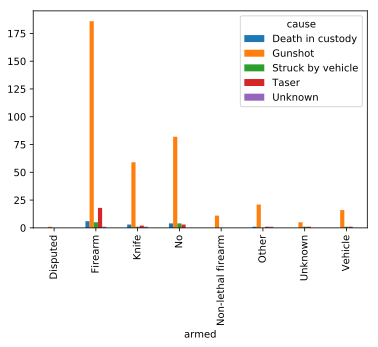

In [29]:
pd.crosstab(df['armed'], df['cause']).plot(kind='bar')

Regardless of what the dead were armed with, they were most often killed by firearms.

In [30]:
df['urate'] = df['urate'].astype('float64')
df['college'] = df['urate'].astype('float64')
df['pov'] = df['urate'].astype('float64')
df['p_income'] = df['p_income'].astype('int64')

In [31]:
df.groupby(['high_lvl_of_unempl'])['pop', 'p_income', 'college', 'pov'].mean().round(3)

,pop,p_income,college,pov
high_lvl_of_unempl,,,,
0,4179.517,31211.966,0.028,0.028
1,4867.258,23869.968,0.125,0.125


It can be noted that in areas with high unemployment, the proportion of people below the poverty line is significantly higher.

# Hypothesis: Police often resort to the use of weapons, which leads to victims in areas with low education and high unemployment

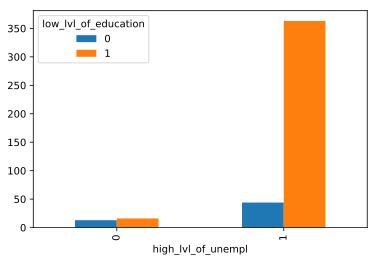

In [32]:
pd.crosstab(df['high_lvl_of_unempl'], df['low_lvl_of_education']).plot(kind='bar')

From the graph it can be seen that the overwhelming majority of deaths occurred in areas with high unemployment and low levels of education.

# Hypothesis: the probability whether a person will be killed or not does not depend on race

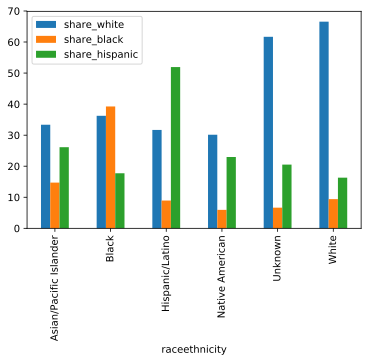

In [34]:
df.groupby(['raceethnicity'])['share_white', 'share_black', 'share_hispanic'].mean().plot(kind='bar')

The graph shows that the race of the deceased correlates with the race, which prevails in that particular tract of the county. This indicates that police officers don't base their decision whether to kill a person or not on a race.